In [1]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [4]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
from langchain.chat_models import init_chat_model
model = init_chat_model("groq:llama-3.1-8b-instant")
response = model.invoke("What is the capital of France?")
print(response.content)

The capital of France is Paris.


# Streaming


In [5]:
for chunk in model.stream("write me an 1000 word essay on the history of rome"):
    print(chunk.content, end="", flush=True)

The History of Rome: From Its Humble Beginnings to Its Rise as a Dominant Power

Rome, one of the world's most iconic cities, has a rich and complex history that spans over two millennia. From its humble beginnings as a small city-state in central Italy to its rise as a dominant power that shaped the course of Western civilization, Rome's history is a testament to the ingenuity, resilience, and determination of its people.

**The Early Years (753-509 BCE)**

The founding of Rome is shrouded in myth and legend. According to tradition, the city was founded by Romulus and Remus, two brothers who were abandoned as infants and suckled by a she-wolf. As the myth goes, Romulus eventually killed his brother and became the first king of Rome. While the myth may be apocryphal, archaeological evidence suggests that the city was indeed inhabited by the Latini tribe as early as the 8th century BCE.

The early Romans were a mix of Latini and Sabines, two neighboring tribes that inhabited the area ar

# BATCh

In [ ]:
# collection of independent request ehich can be processedi in parallel

In [8]:
responses=model.batch([
    "What is the capital of France?",   
    "What is the capital of Germany?",
    "What is the capital of Italy?" ],
    config={'max_concurrency': 2,}
)


for response in responses:
    print(response.content)

The capital of France is Paris.
The capital of Germany is Berlin.
The capital of Italy is Rome.


# MOdel with tools

In [19]:
from langchain.tools import tool
@tool

def get_current_weather(location: str) -> str:
    """Get the current weather in a given location"""
    # code to get the current weather in the given location
    print("The current weather in {} is sunny with a temperature of 25 degrees Celsius.".format(location))


model_with_tool=model.bind_tools([get_current_weather])
response=model_with_tool.invoke("What is the current weather in New York?")    

print(response)

content='' additional_kwargs={'tool_calls': [{'id': '9qhd8jnyc', 'function': {'arguments': '{"location":"New York"}', 'name': 'get_current_weather'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 227, 'total_tokens': 243, 'completion_time': 0.052904097, 'completion_tokens_details': None, 'prompt_time': 0.028498228, 'prompt_tokens_details': None, 'queue_time': 0.047742222, 'total_time': 0.081402325}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019c4c4b-6557-75b2-873e-3749e8747ba8-0' tool_calls=[{'name': 'get_current_weather', 'args': {'location': 'New York'}, 'id': '9qhd8jnyc', 'type': 'tool_call'}] invalid_tool_calls=[] usage_metadata={'input_tokens': 227, 'output_tokens': 16, 'total_tokens': 243}


In [13]:
response.tool_calls 

[{'name': 'get_current_weather',
  'args': {'location': 'New York'},
  'id': 'x2sxf2xsw',
  'type': 'tool_call'}]

In [20]:
messages=[{"role": "user", "content": "What is the current weather in New York?"}]
ai_response=model_with_tool.invoke(messages)
messages.append(ai_response)

for tool_call in ai_response.tool_calls:
    tool_response=get_current_weather.invoke(tool_call)
    messages.append(tool_response)


final_response=model_with_tool.invoke(messages)
print(final_response.text)

The current weather in New York is sunny with a temperature of 25 degrees Celsius.
Since the function call was successful but returned null, it is likely that the function returns null when there is no weather data available for a given location. To get more information about the current weather, you can try checking the function's documentation or the API used by the function.

However, for the sake of providing a response, here is a possible interpretation of the null result:

The current weather in New York is unknown or not available at this time. Please try checking again later for more information.


In [22]:
from langchain.agents import create_agent
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


agent=create_agent(model="groq:llama-3.1-8b-instant", tools=[get_current_weather] , system_prompt="You are a helpful assistant that provides the current weather information to the user.")

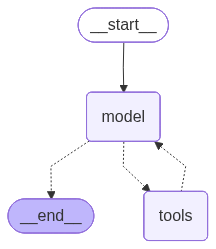

In [23]:
agent

In [24]:
response.usage_metadata

{'input_tokens': 227, 'output_tokens': 16, 'total_tokens': 243}